# Primer parcial
Nombre: Vargas Lezano César Luis

Carrera: Ingenieria de sistemas

CU: 35-5303

## Acerca del dataset
El dataset cuenta con 31.9 millores de datos

de loc cuales por temas de rendimiento y limitante se seleccionara 80000 datos y 20 columnas, las cuales serian:

# Temática del Dataset: Calcular la cantidad de coronas de Clash Royale
# Variables de Entrada: winner.totalcard.level, 
* winner.troop.count, 
* winner.structure.count, 
* winner.spell.count, 
* winner.common.count, 
* winner.rare.count, 
* winner.epic.count, 
* winner.legendary.count 
* winner.elixir.average
* loser.crowns
* loser.totalcard.level, 
* loser.troop.count, 
* loser.structure.count, 
* loser.spell.count, 
* loser.common.count, 
* loser.rare.count, 
* loser.epic.count, 
* loser.legendary.count 
* loser.elixir.average
# Variables de Salida: 
* - winner.crowns

# 1.- Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

Para poder realizar este paso se obta por insertar nuevas columnas con sus datos para cumplir de manera que pide el enunciado, de la siguiente manera:

# Atributos caracteres
Se usara 3 tipos de caracteres que son los "tipos de carta"los cuales tendran un significado o valor:
* A = tropp
* B = spell
* C = structure

# Atributo texto
Se usara 2 tipos para esto, que serian la estrategia que usa el jugador, como puede ser:
* Offensive
* Defensive

# Atributos booleanos
Se usara true o false para poder determinar si el jugador uso cartas legendarias, y otro para determinar si el usuario obtuvo las 3 coronoas

* Cartas legendarias
* Obtuvo 3 coronas

In [128]:
import pandas as pd
import numpy as np

# Cargar el dataset original
data = pd.read_csv('./BattlesStaging_01012021_WL_tagged.csv', usecols=[39,40,41,42,43,44,45,46,47,65,66,67,68,69,70,71,72,73,16,8], nrows=80000)

# Definir las posibles categorías y valores
strategy_types = ['Offensive', 'Defensive']
card_types = ['A', 'B', 'C']
booleans = [True, False]

# Generar valores aleatorios para las nuevas columnas
data['winner.strategy_type'] = np.random.choice(strategy_types, len(data))
data['loser.strategy_type'] = np.random.choice(strategy_types, len(data))
data['winner.fav_card_type'] = np.random.choice(card_types, len(data))
data['loser.fav_card_type'] = np.random.choice(card_types, len(data))
data['winner.used_legendary'] = np.random.choice(booleans, len(data))
data['loser.used_legendary'] = np.random.choice(booleans, len(data))
data['winner.triple_crown_win'] = np.random.choice(booleans, len(data))

# Guardar el nuevo dataset sintético en un archivo CSV
data.to_csv('synthetic_dataset.csv', index=False)

# 2.- Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

verificando los valores actuales del dataset sintetico

In [129]:
data = pd.read_csv('synthetic_dataset.csv')
print(data.head())

   winner.crowns  loser.crowns  winner.totalcard.level  winner.troop.count  \
0            2.0           1.0                     104                   5   
1            1.0           0.0                      99                   5   
2            2.0           0.0                     104                   6   
3            2.0           1.0                      80                   4   
4            3.0           0.0                     104                   5   

   winner.structure.count  winner.spell.count  winner.common.count  \
0                       1                   2                    3   
1                       1                   2                    2   
2                       0                   2                    2   
3                       0                   4                    1   
4                       1                   2                    3   

   winner.rare.count  winner.epic.count  winner.legendary.count  ...  \
0                  2                  

In [130]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   winner.crowns            80000 non-null  float64
 1   loser.crowns             80000 non-null  float64
 2   winner.totalcard.level   80000 non-null  int64  
 3   winner.troop.count       80000 non-null  int64  
 4   winner.structure.count   80000 non-null  int64  
 5   winner.spell.count       80000 non-null  int64  
 6   winner.common.count      80000 non-null  int64  
 7   winner.rare.count        80000 non-null  int64  
 8   winner.epic.count        80000 non-null  int64  
 9   winner.legendary.count   80000 non-null  int64  
 10  winner.elixir.average    80000 non-null  float64
 11  loser.totalcard.level    80000 non-null  int64  
 12  loser.troop.count        80000 non-null  int64  
 13  loser.structure.count    80000 non-null  int64  
 14  loser.spell.count     

 Como se puede observar se cuenta con 80000 datos y las 26 columnas (contando desde 0)

 Ahora duplicando 80000 nuevos valores, sin que se repitan con los primeros 80000

In [131]:
# Definir las posibles categorías y valores
strategy_types = ['Offensive', 'Defensive']
card_types = ['A', 'B', 'C']
booleans = [True, False]

# Número de filas que queremos generar
num_new_rows = len(data)

# Generar valores aleatorios para las nuevas columnas
new_data = pd.DataFrame({
    'winner.crowns': np.random.choice(data['winner.crowns'].unique(), num_new_rows),
    'loser.crowns': np.random.choice(data['loser.crowns'].unique(), num_new_rows),
    'winner.totalcard.level': np.random.choice(data['winner.totalcard.level'].unique(), num_new_rows),
    'winner.troop.count': np.random.choice(data['winner.troop.count'].unique(), num_new_rows),
    'winner.structure.count': np.random.choice(data['winner.structure.count'].unique(), num_new_rows),
    'winner.spell.count': np.random.choice(data['winner.spell.count'].unique(), num_new_rows),
    'winner.common.count': np.random.choice(data['winner.common.count'].unique(), num_new_rows),
    'winner.rare.count': np.random.choice(data['winner.rare.count'].unique(), num_new_rows),
    'winner.epic.count': np.random.choice(data['winner.epic.count'].unique(), num_new_rows),
    'winner.legendary.count': np.random.choice(data['winner.legendary.count'].unique(), num_new_rows),
    'winner.elixir.average': np.random.choice(data['winner.elixir.average'].unique(), num_new_rows),
    'loser.totalcard.level': np.random.choice(data['loser.totalcard.level'].unique(), num_new_rows),
    'loser.troop.count': np.random.choice(data['loser.troop.count'].unique(), num_new_rows),
    'loser.structure.count': np.random.choice(data['loser.structure.count'].unique(), num_new_rows),
    'loser.spell.count': np.random.choice(data['loser.spell.count'].unique(), num_new_rows),
    'loser.common.count': np.random.choice(data['loser.common.count'].unique(), num_new_rows),
    'loser.rare.count': np.random.choice(data['loser.rare.count'].unique(), num_new_rows),
    'loser.epic.count': np.random.choice(data['loser.epic.count'].unique(), num_new_rows),
    'loser.legendary.count': np.random.choice(data['loser.legendary.count'].unique(), num_new_rows),
    'loser.elixir.average': np.random.choice(data['loser.elixir.average'].unique(), num_new_rows),
    'winner.strategy_type': np.random.choice(strategy_types, num_new_rows),
    'loser.strategy_type': np.random.choice(strategy_types, num_new_rows),
    'winner.fav_card_type': np.random.choice(card_types, num_new_rows),
    'loser.fav_card_type': np.random.choice(card_types, num_new_rows),
    'winner.used_legendary': np.random.choice(booleans, num_new_rows),
    'loser.used_legendary': np.random.choice(booleans, num_new_rows),
    'winner.triple_crown_win': np.random.choice(booleans, num_new_rows)
})

# Concatenar los nuevos datos con los existentes
data = pd.concat([data, new_data], ignore_index=True)

# Guardar el dataset actualizado en el mismo archivo CSV
data.to_csv('synthetic_dataset.csv', index=False)

Verfificando que se hayan generado los nuevos valores correctamente

In [132]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   winner.crowns            160000 non-null  float64
 1   loser.crowns             160000 non-null  float64
 2   winner.totalcard.level   160000 non-null  int64  
 3   winner.troop.count       160000 non-null  int64  
 4   winner.structure.count   160000 non-null  int64  
 5   winner.spell.count       160000 non-null  int64  
 6   winner.common.count      160000 non-null  int64  
 7   winner.rare.count        160000 non-null  int64  
 8   winner.epic.count        160000 non-null  int64  
 9   winner.legendary.count   160000 non-null  int64  
 10  winner.elixir.average    160000 non-null  float64
 11  loser.totalcard.level    160000 non-null  int64  
 12  loser.troop.count        160000 non-null  int64  
 13  loser.structure.count    160000 non-null  int64  
 14  lose

como se puede evidenciar pasamos de tener 80000 datoa a 160000 en sus 27 columnas y haciendo que no se repitan los nuevos datos generados

# 3.- Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

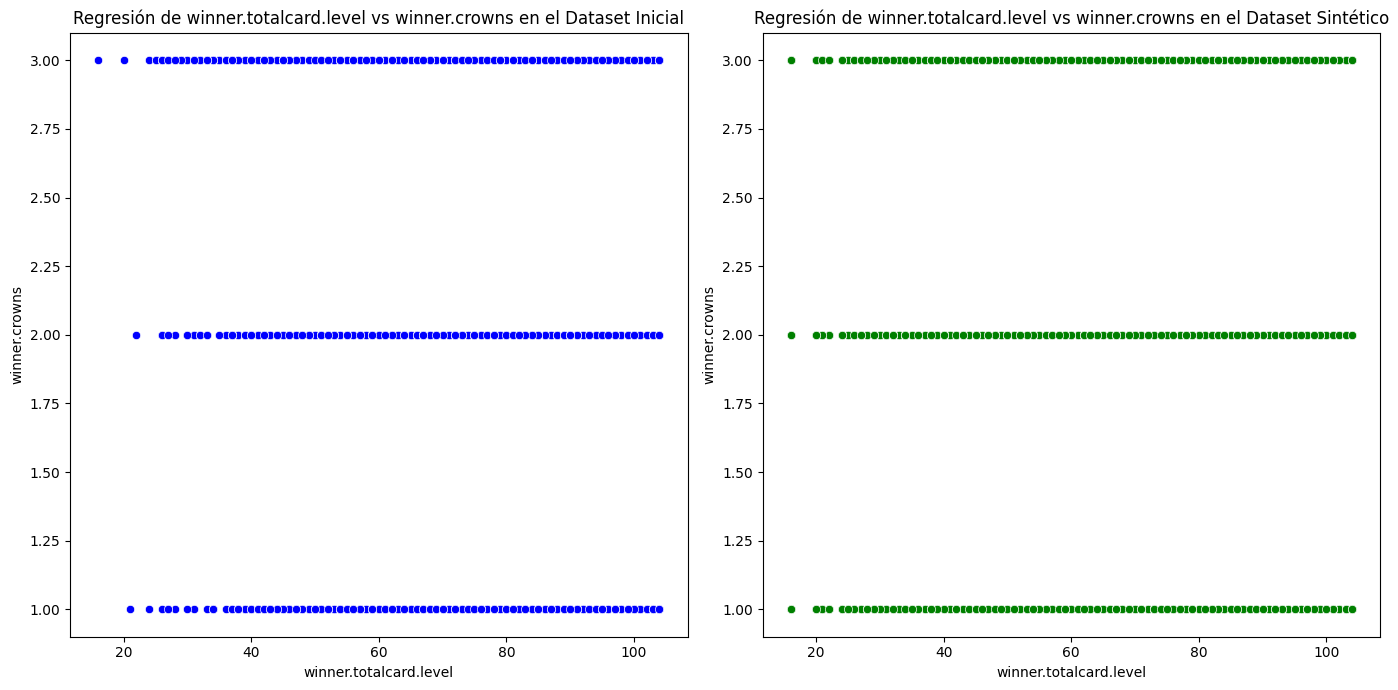

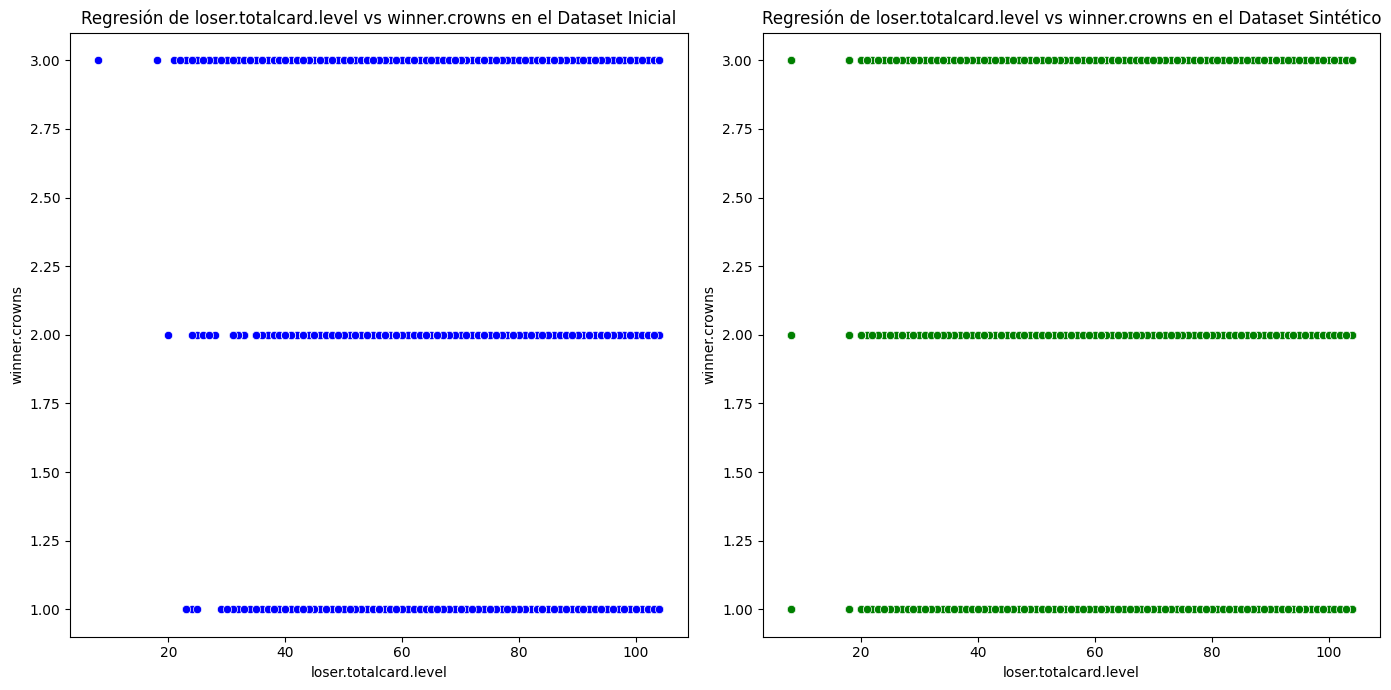

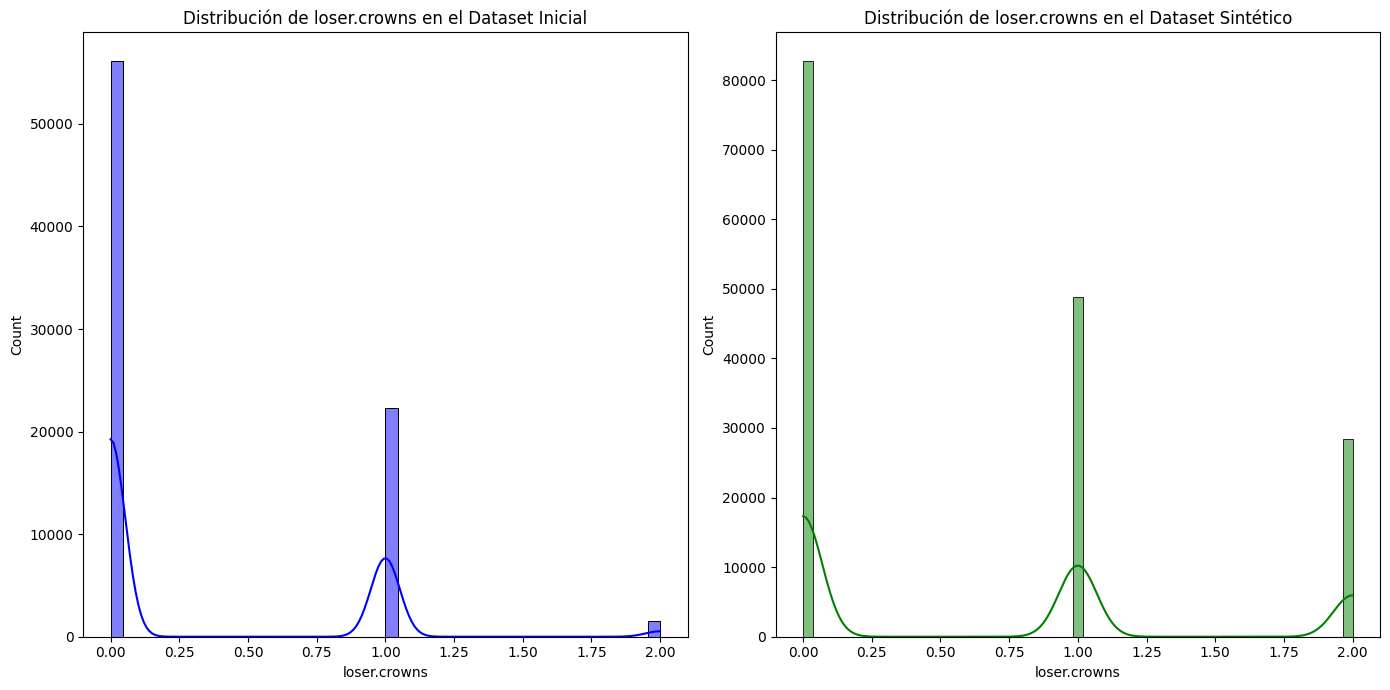

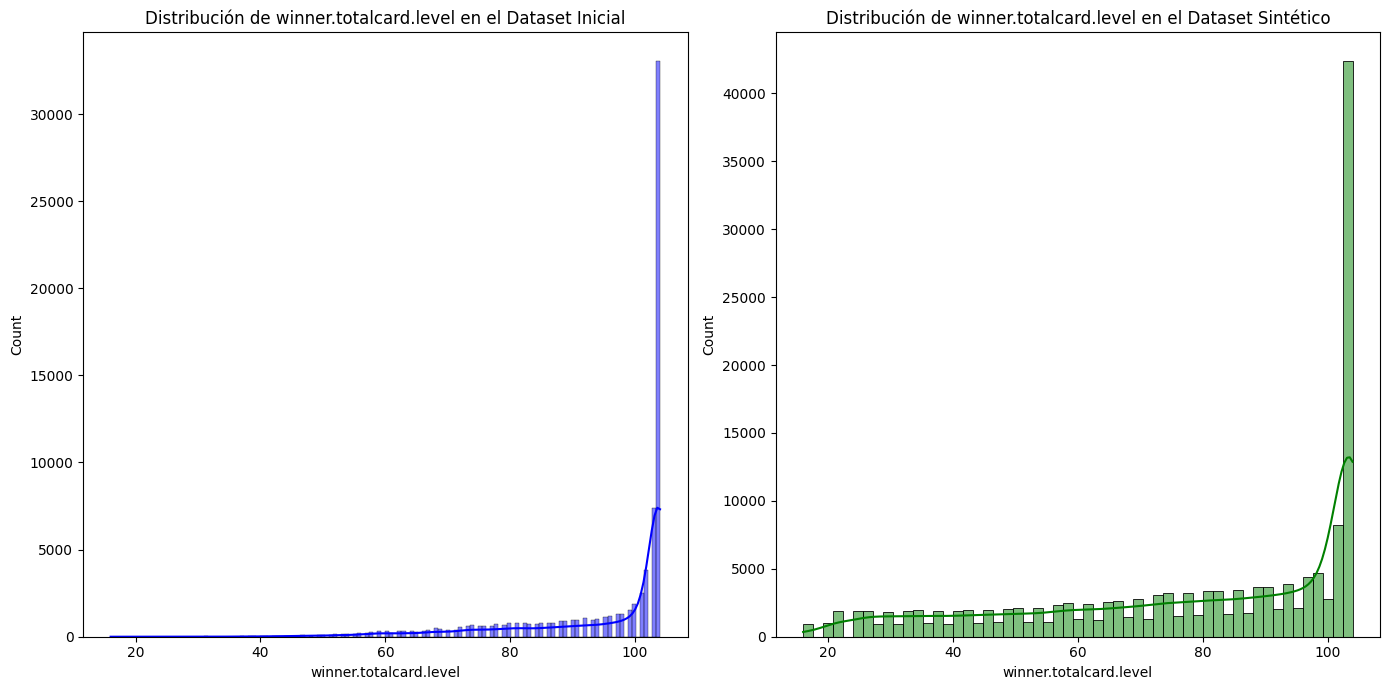

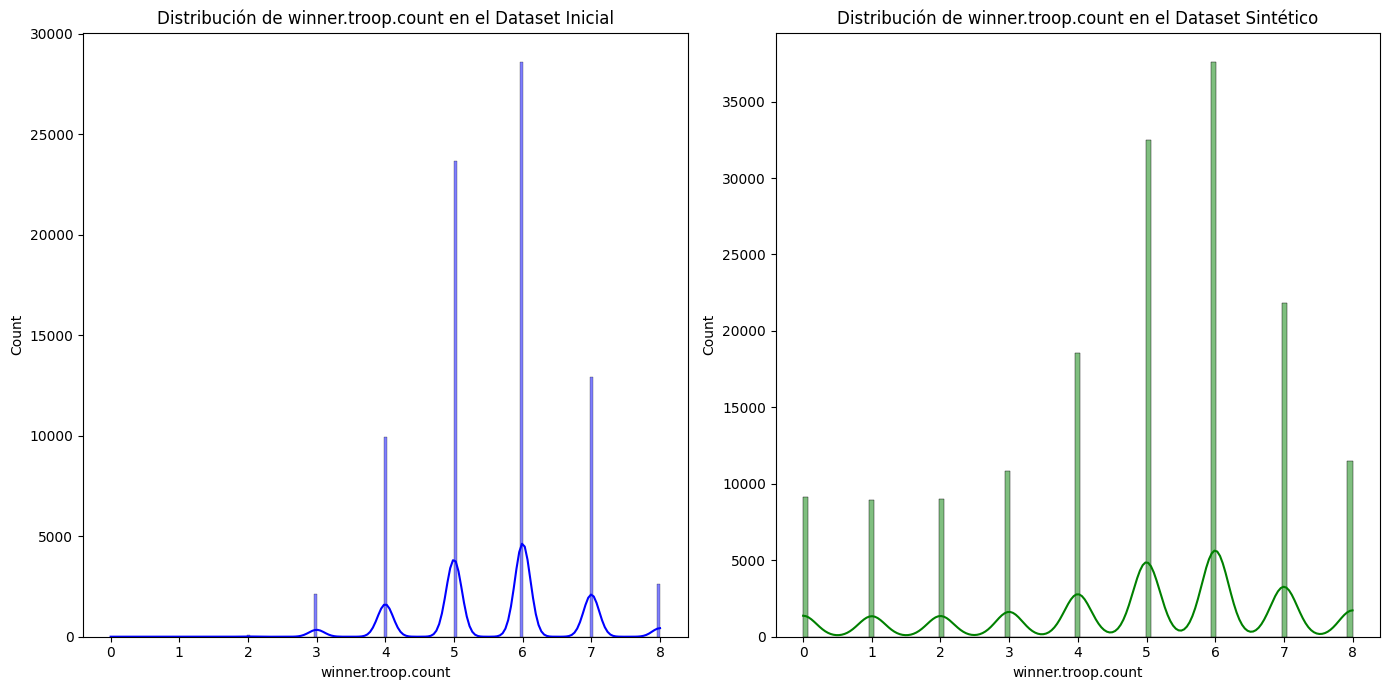

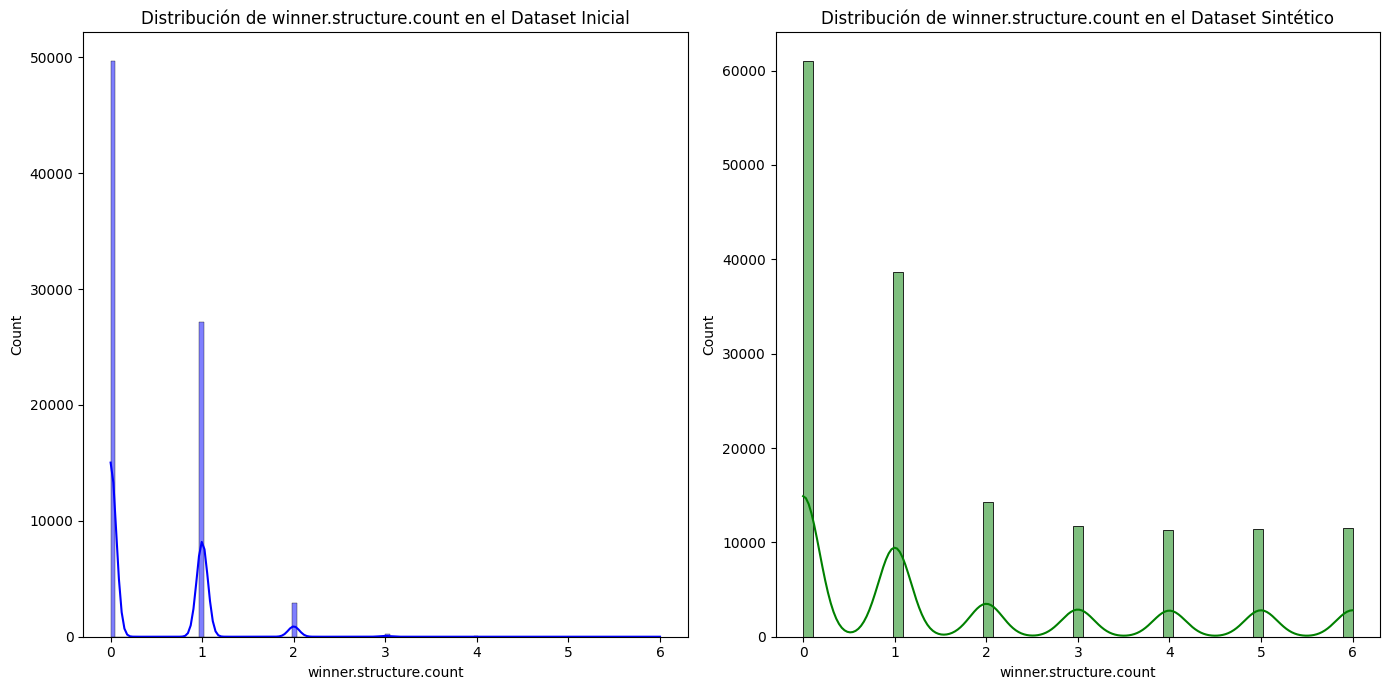

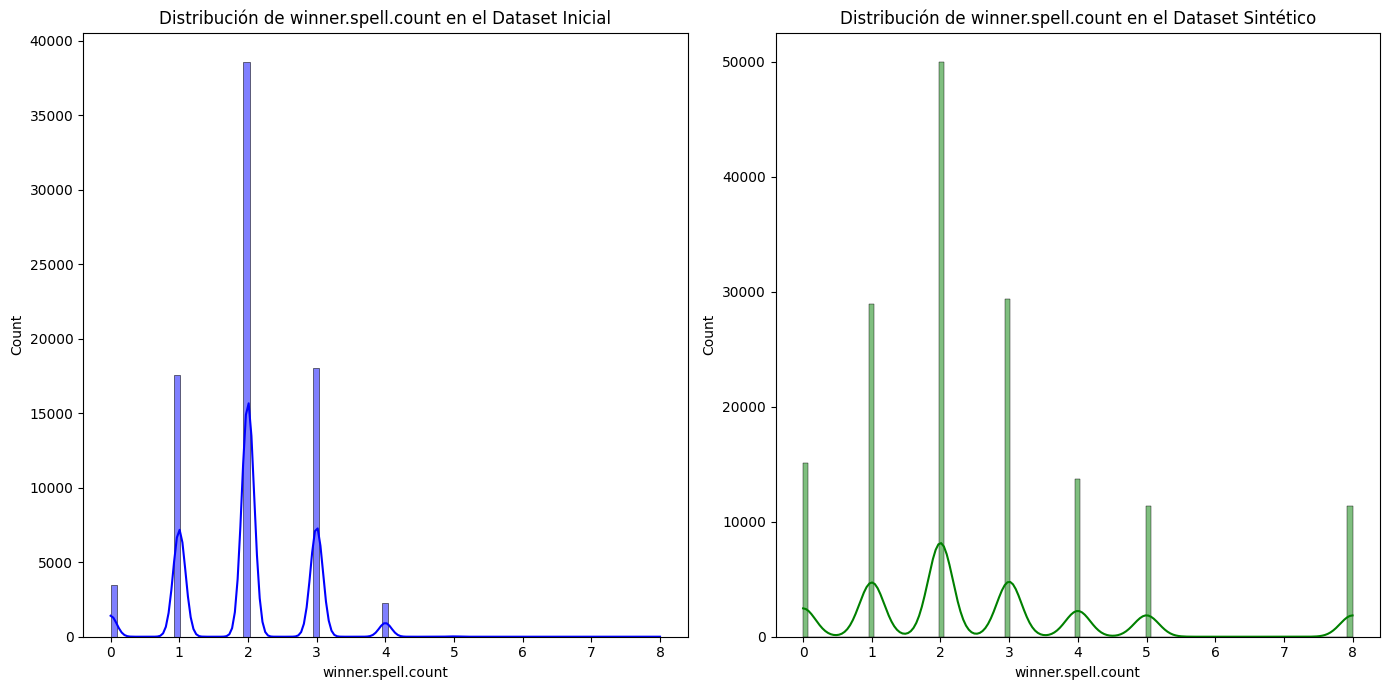

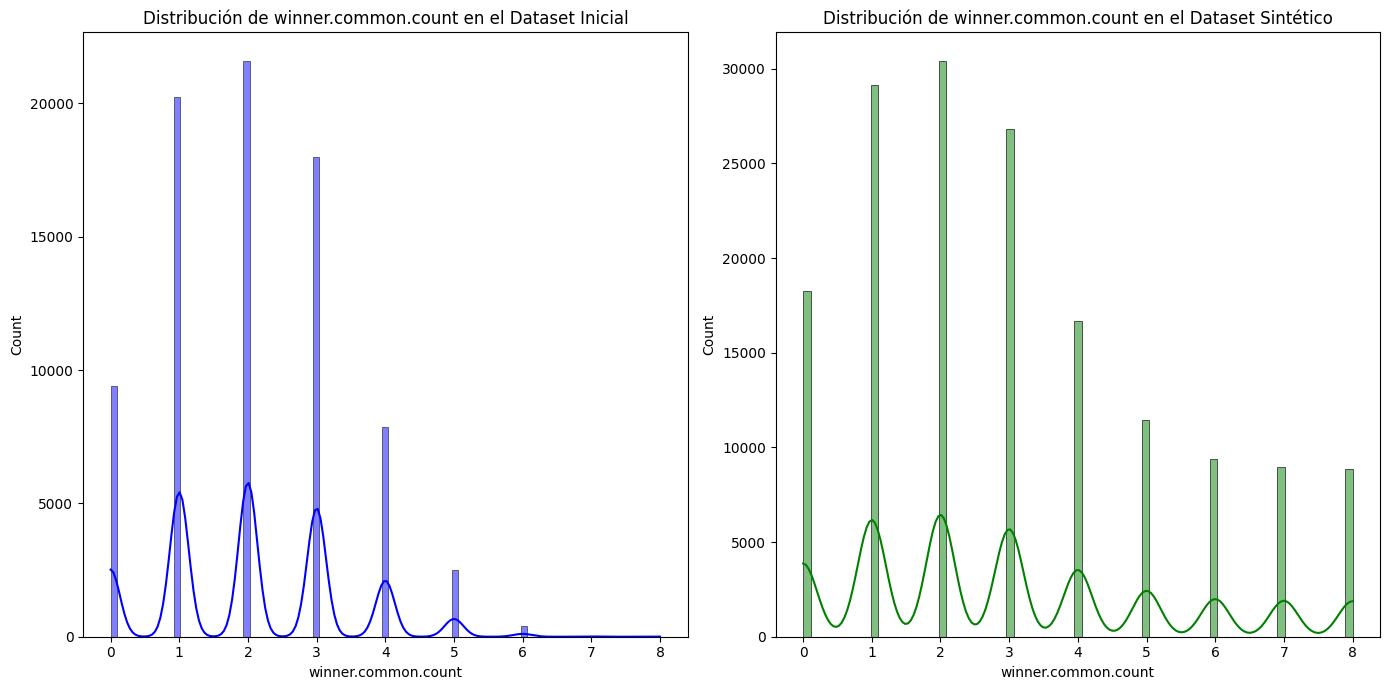

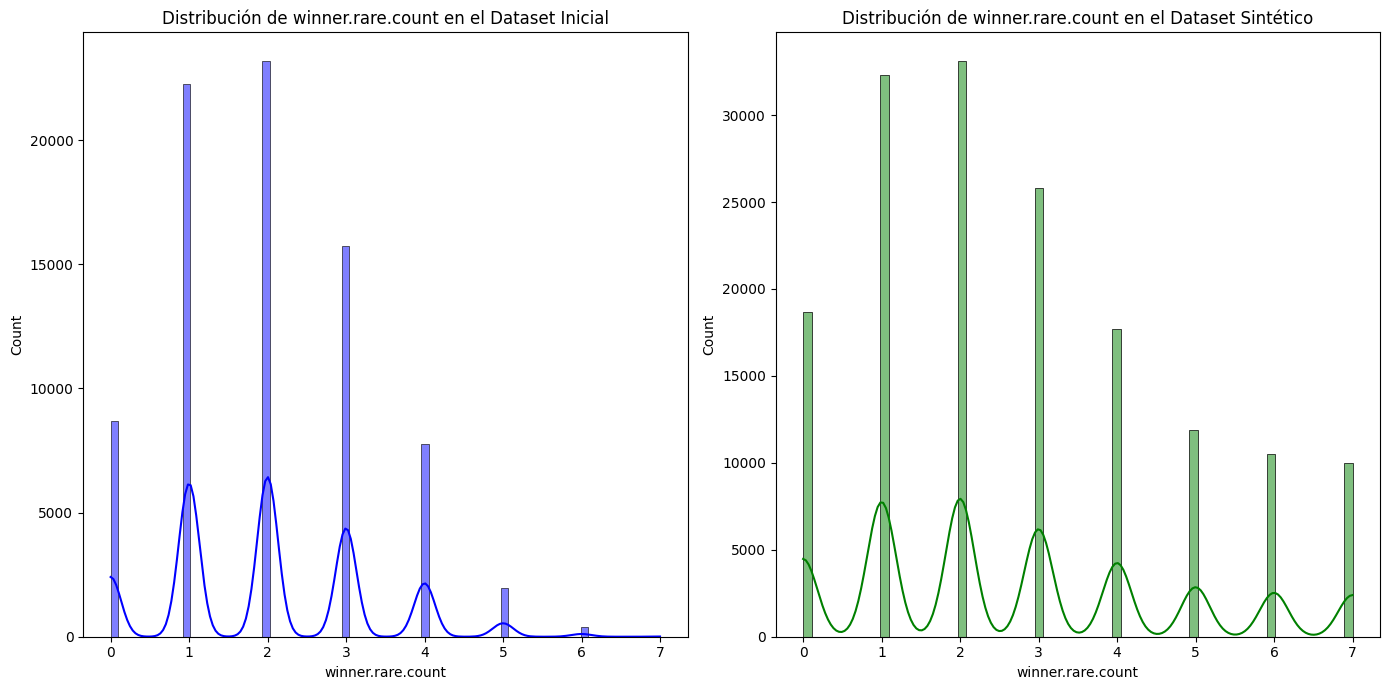

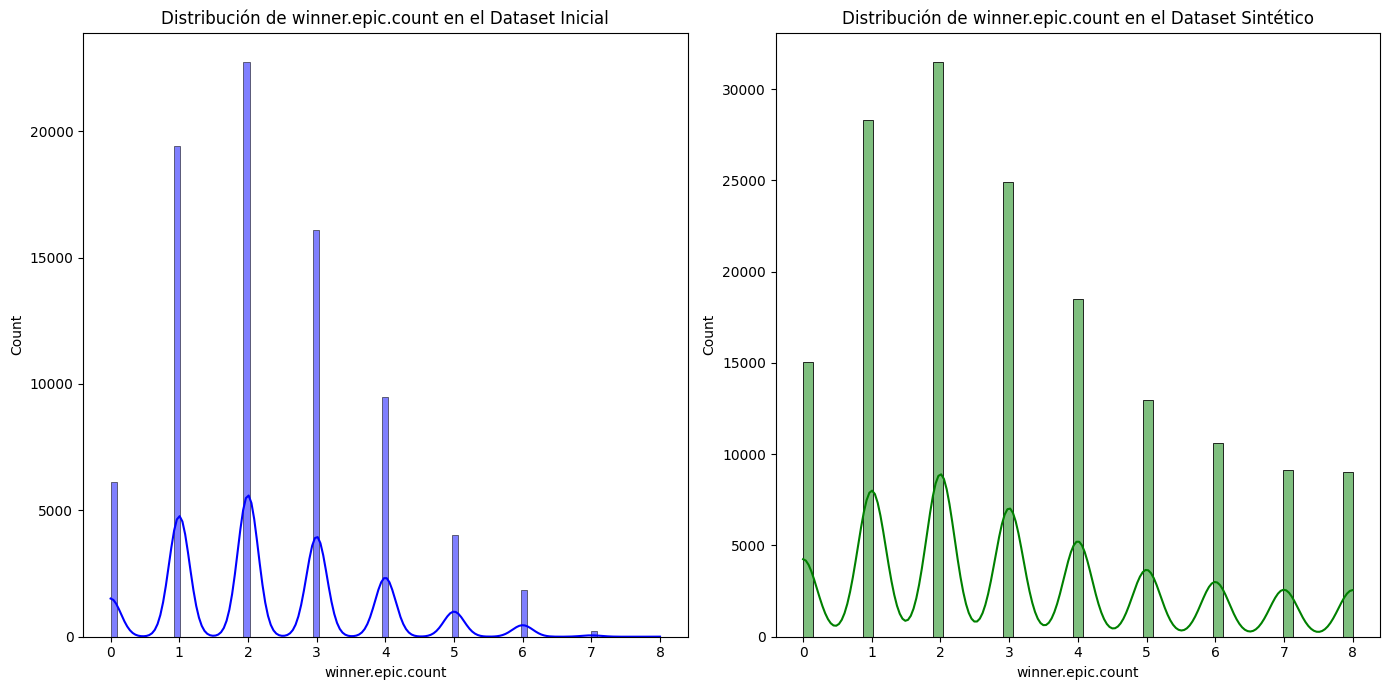

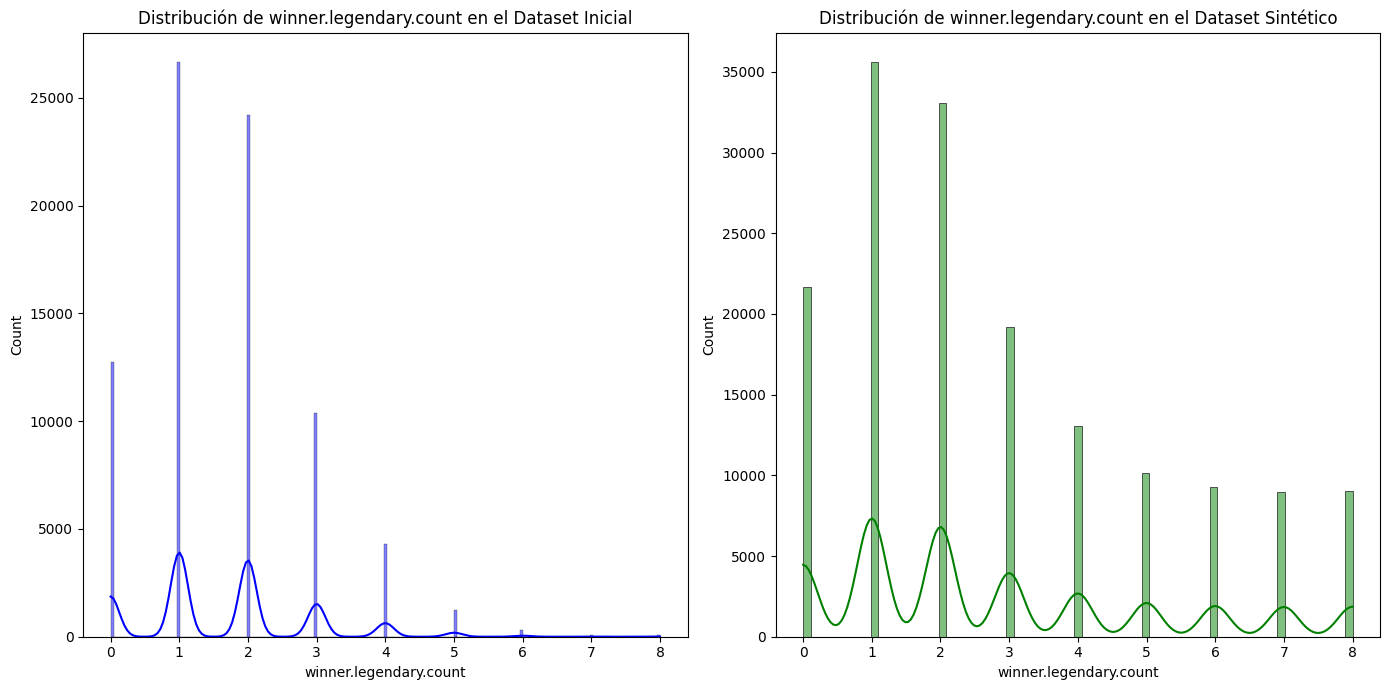

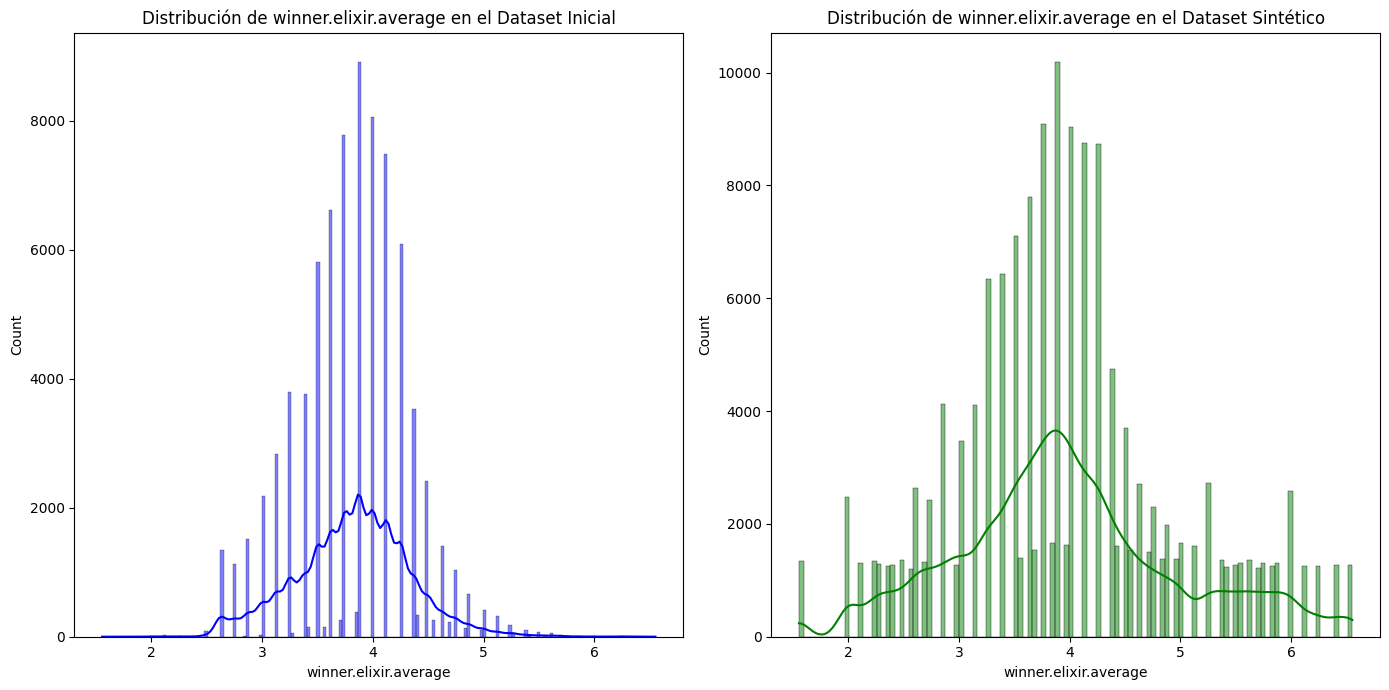

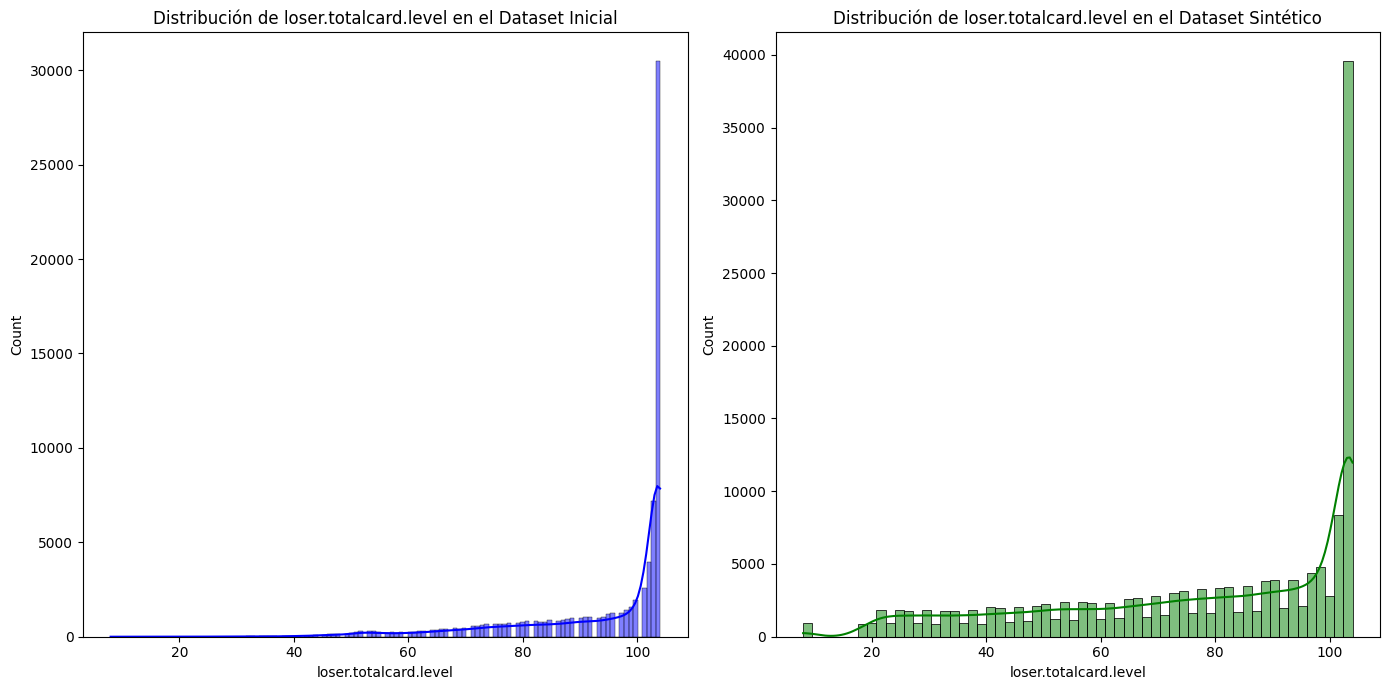

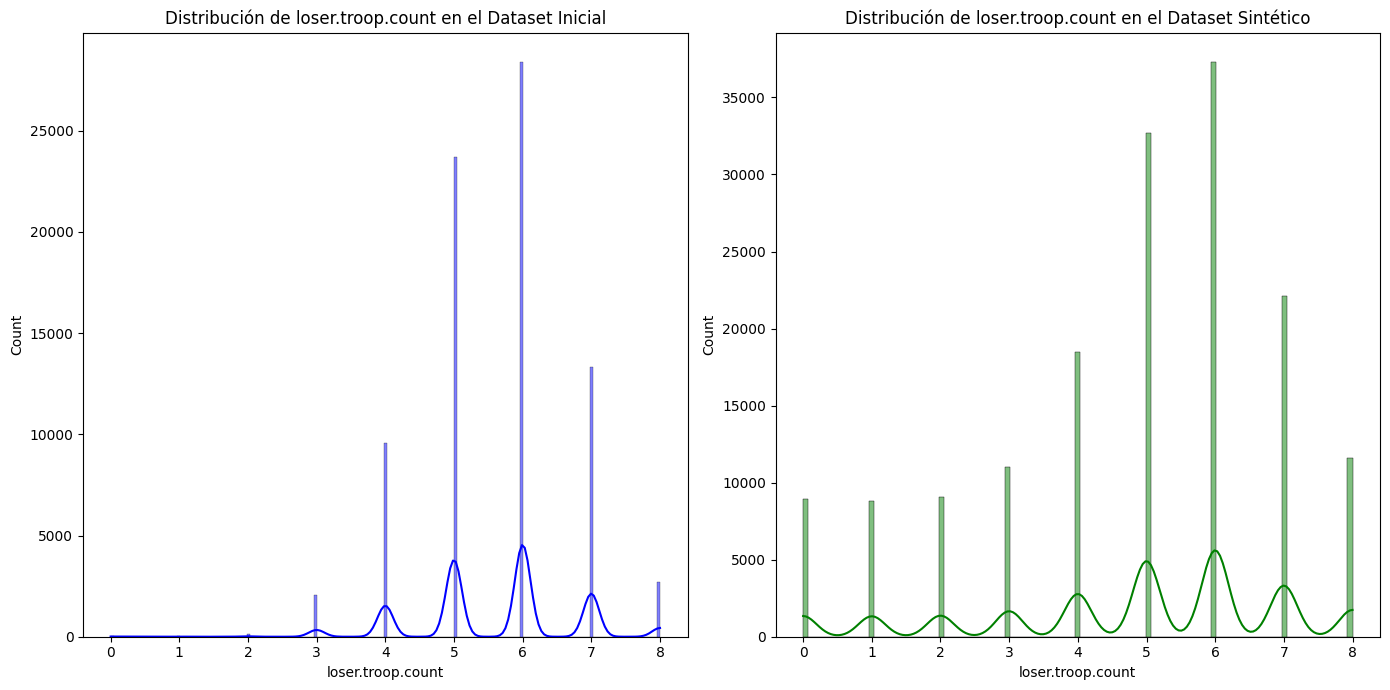

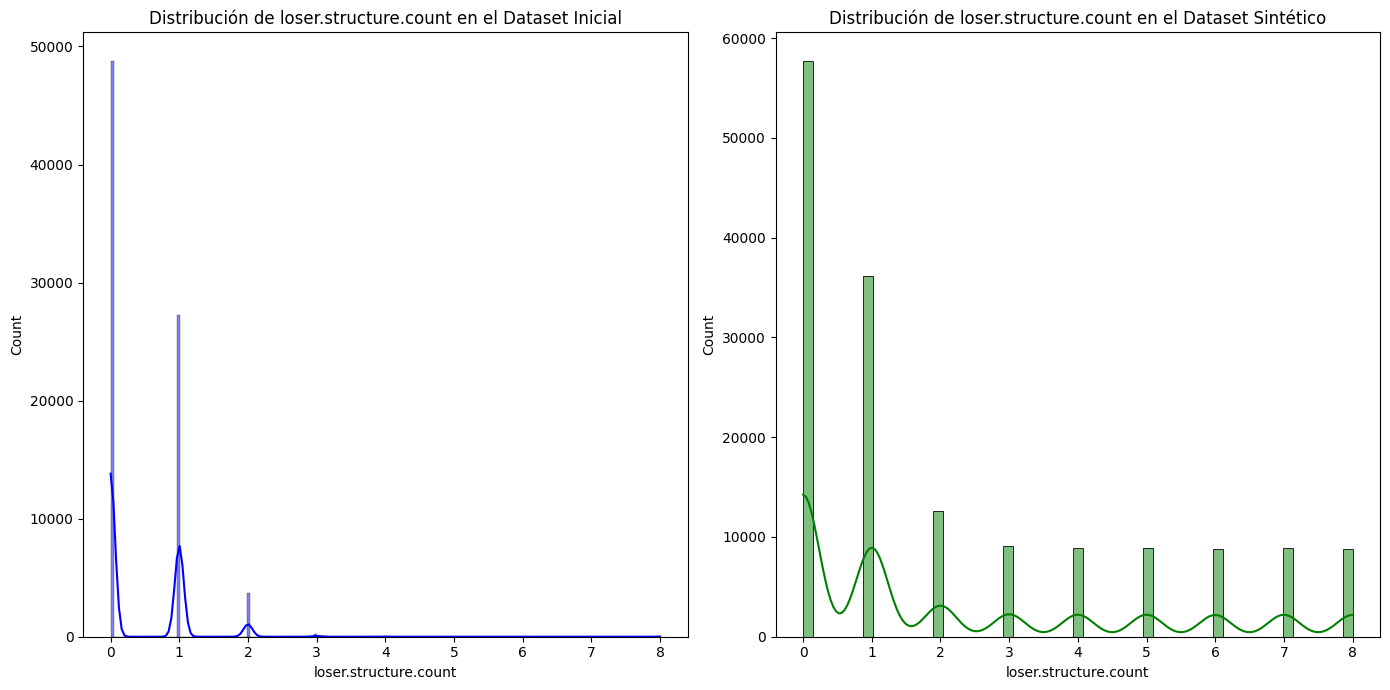

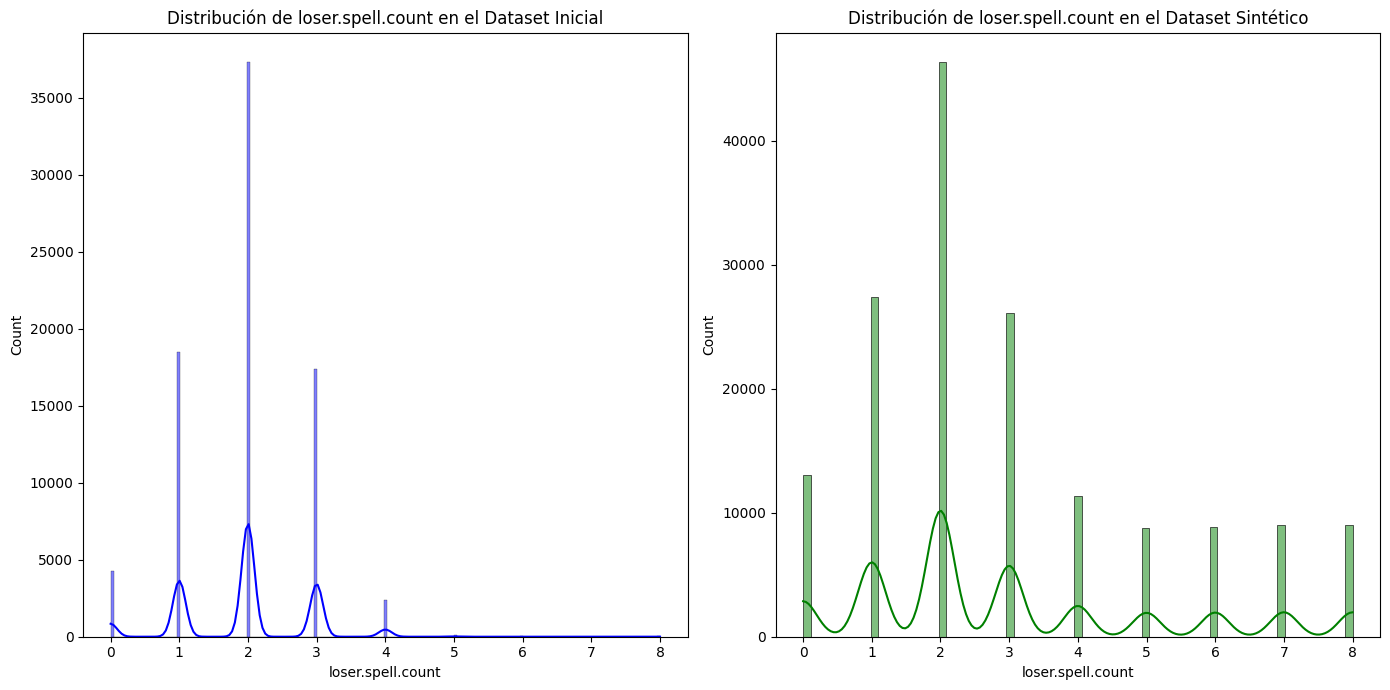

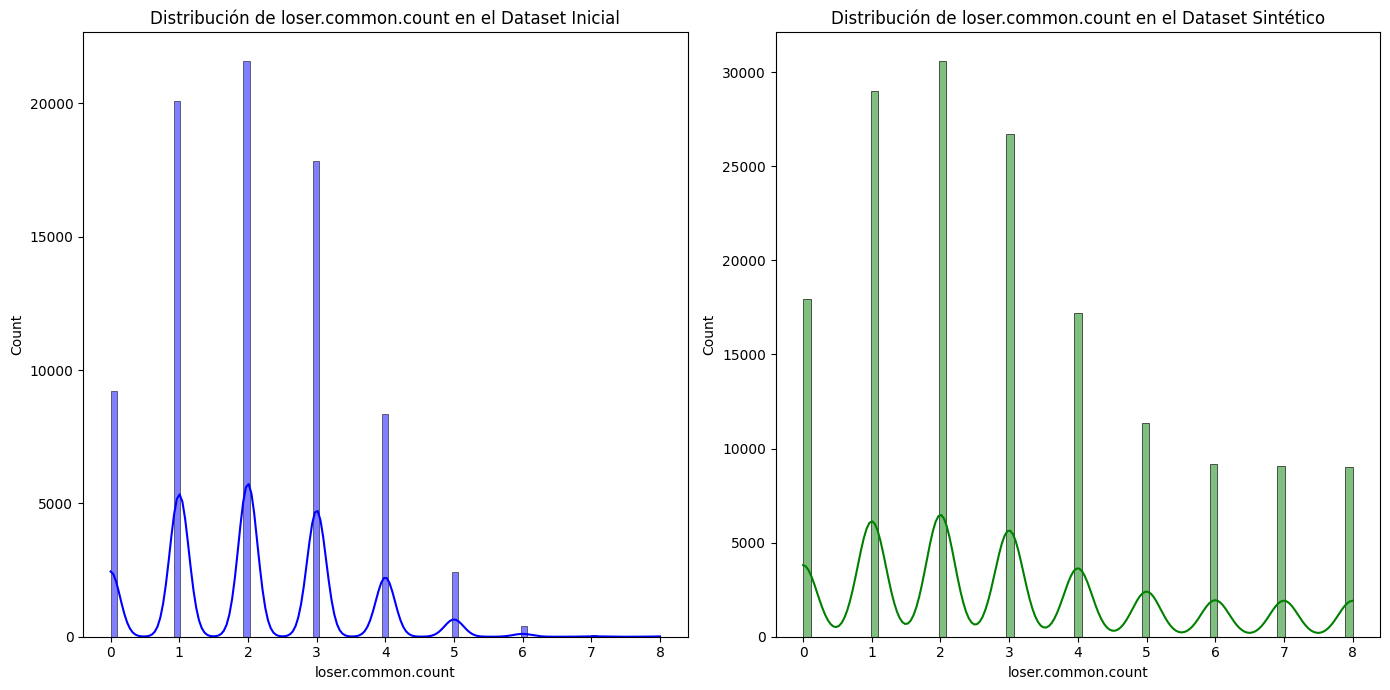

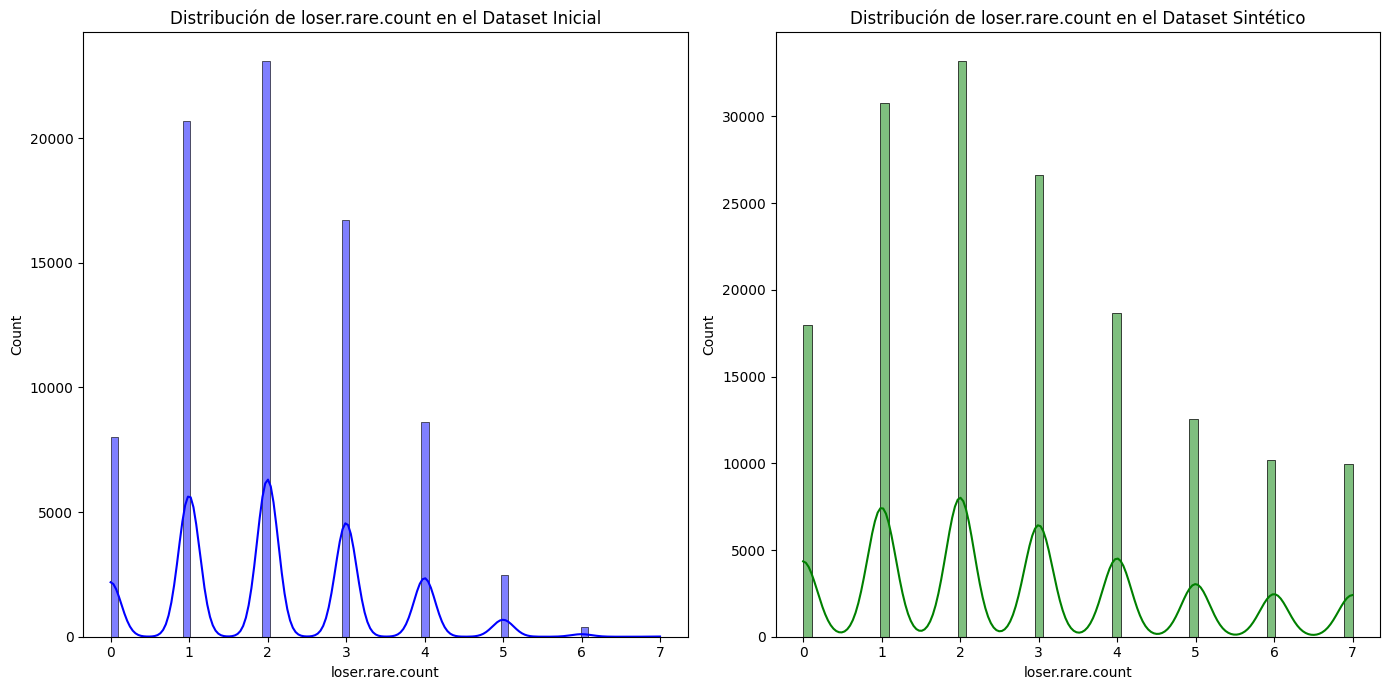

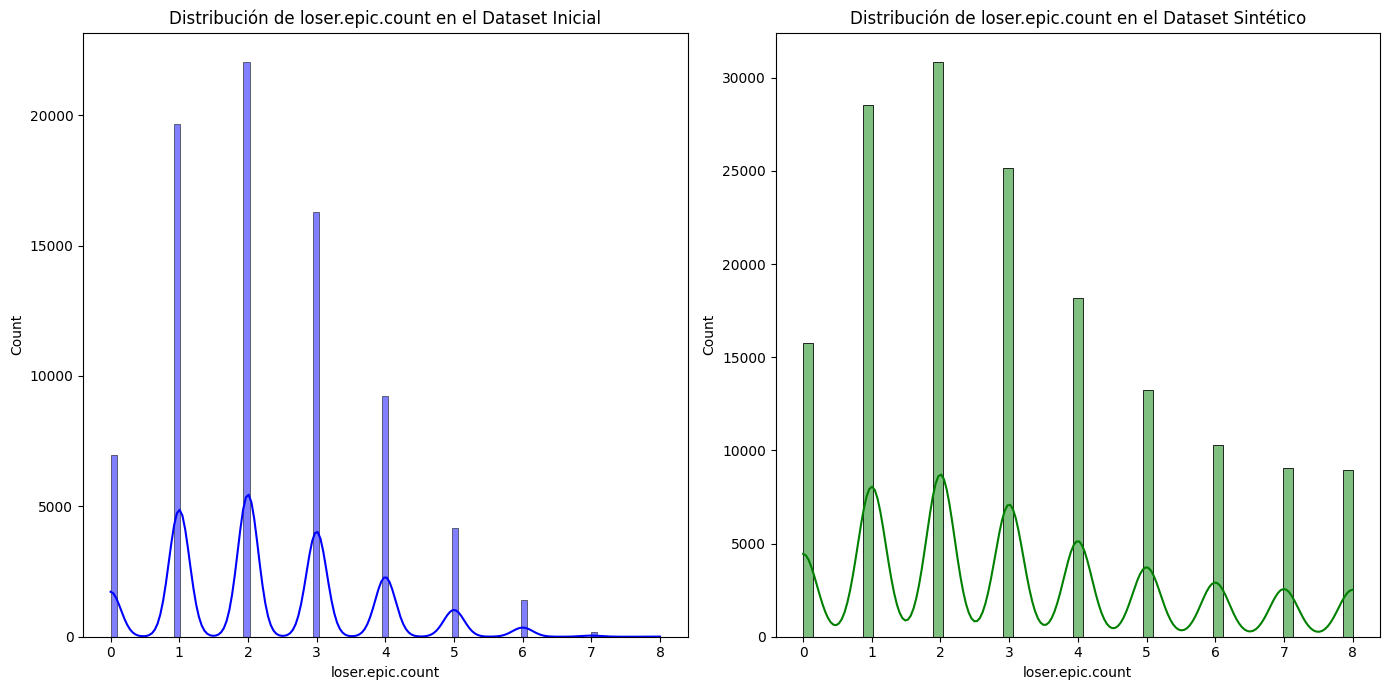

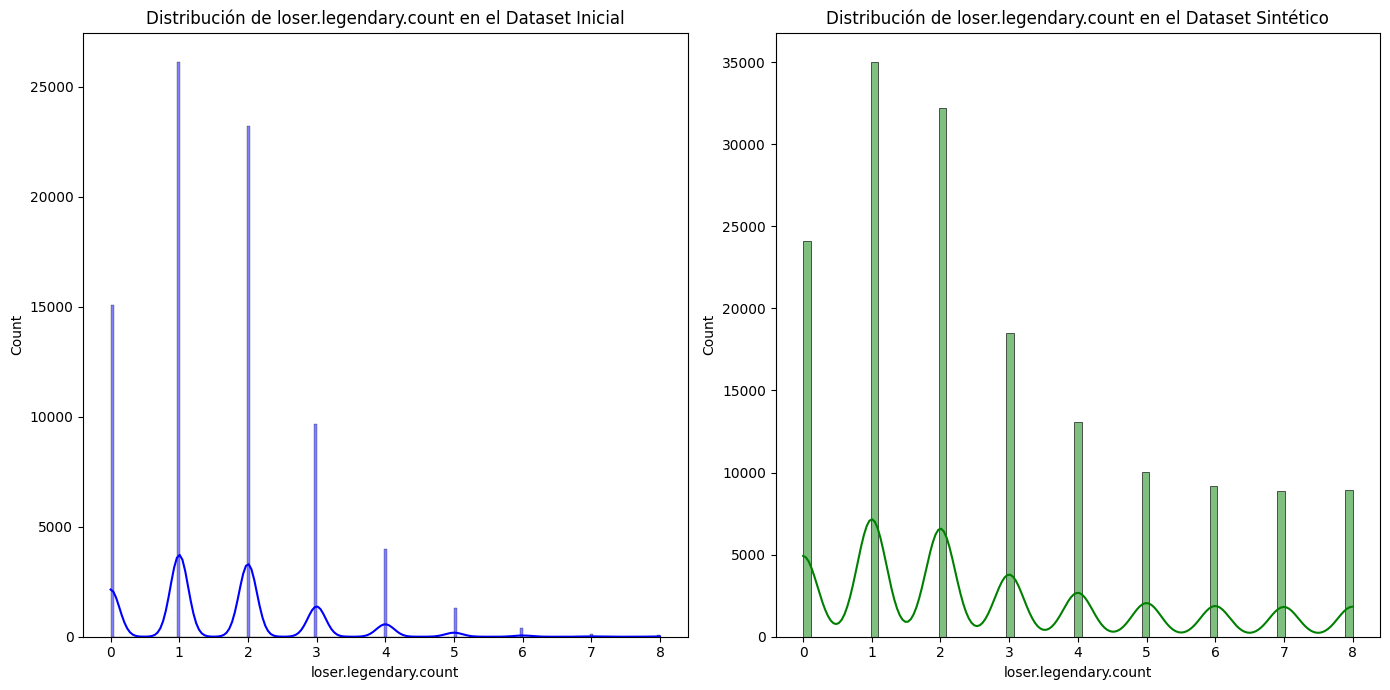

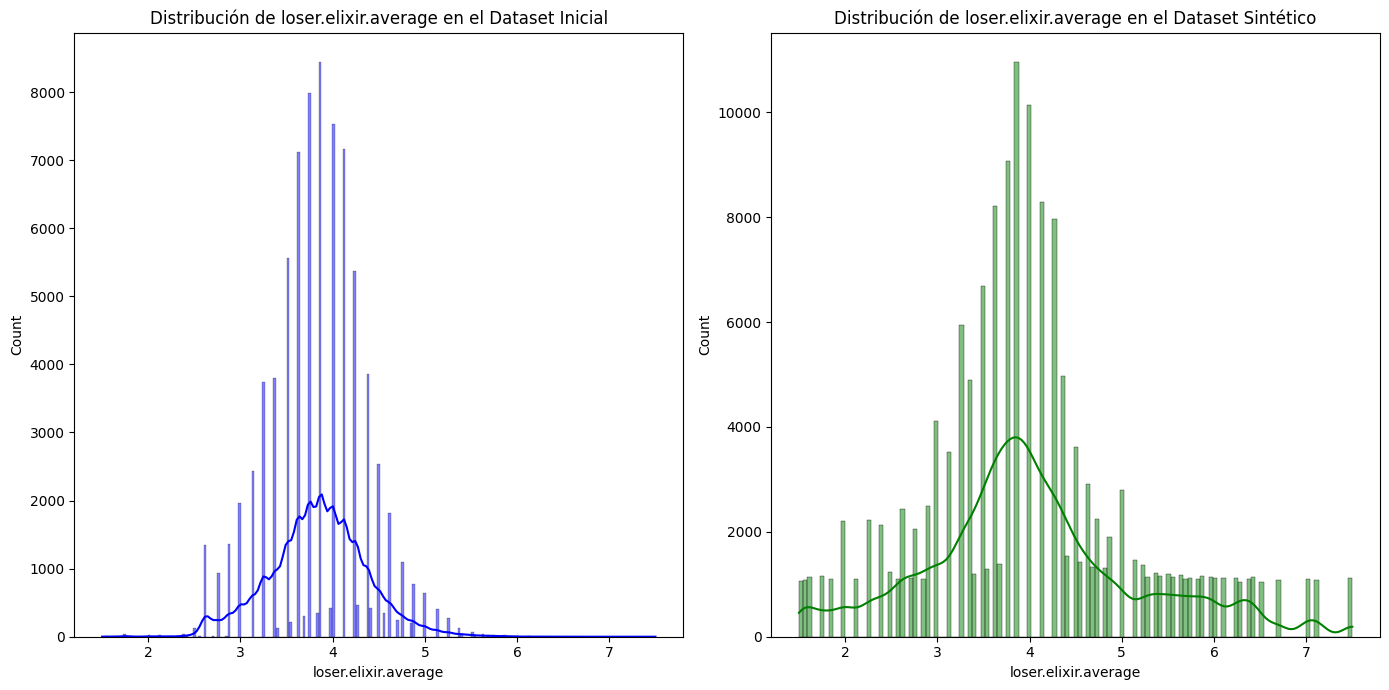

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset inicial
initial_data = pd.read_csv('./BattlesStaging_01012021_WL_tagged.csv', usecols=[39,40,41,42,43,44,45,46,47,65,66,67,68,69,70,71,72,73,16,8], nrows=80000)

# Cargar el dataset sintético
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Seleccionar una característica para graficar
x_feature = 'winner.totalcard.level'
y_feature = 'winner.crowns'

# Crear una gráfica de regresión para la característica seleccionada
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=initial_data[x_feature], y=initial_data[y_feature], color='blue')
plt.title('Regresión de {} vs {} en el Dataset Inicial'.format(x_feature, y_feature))

plt.subplot(1, 2, 2)
sns.scatterplot(x=synthetic_data[x_feature], y=synthetic_data[y_feature], color='green')
plt.title('Regresión de {} vs {} en el Dataset Sintético'.format(x_feature, y_feature))

plt.tight_layout()
plt.show()

# Crear una gráfica de regresión para otra característica
x_feature = 'loser.totalcard.level'

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=initial_data[x_feature], y=initial_data[y_feature], color='blue')
plt.title('Regresión de {} vs {} en el Dataset Inicial'.format(x_feature, y_feature))

plt.subplot(1, 2, 2)
sns.scatterplot(x=synthetic_data[x_feature], y=synthetic_data[y_feature], color='green')
plt.title('Regresión de {} vs {} en el Dataset Sintético'.format(x_feature, y_feature))

plt.tight_layout()
plt.show()

# Crear gráficas de distribución para todas las características
features = initial_data.columns

for feature in features:
    if feature != y_feature:  # Evitar graficar y_feature contra sí misma
        plt.figure(figsize=(14, 7))

        plt.subplot(1, 2, 1)
        sns.histplot(initial_data[feature], kde=True, color='blue')
        plt.title('Distribución de {} en el Dataset Inicial'.format(feature))

        plt.subplot(1, 2, 2)
        sns.histplot(synthetic_data[feature], kde=True, color='green')
        plt.title('Distribución de {} en el Dataset Sintético'.format(feature))

        plt.tight_layout()
        plt.show()


# 4.- Dividir los datos del dataset sintético en datos de entrenamiento y prueba

Ahora se debe de dividir los datos del dataset sintetico con 160000 datos, en un 80% entrenamiento y 20% prueba

In [134]:
import pandas as pd

# Cargar el dataset sintético
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Mezclar los datos aleatoriamente
synthetic_data = synthetic_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Calcular el índice de división
split_index = int(0.8 * len(synthetic_data))

# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_data = synthetic_data[:split_index]
test_data = synthetic_data[split_index:]

# Guardar los datasets de entrenamiento y prueba en archivos CSV
train_data.to_csv('synthetic_train_data.csv', index=False)
test_data.to_csv('synthetic_test_data.csv', index=False)

print(f"Tamaño del dataset de entrenamiento: {len(train_data)}")
print(f"Tamaño del dataset de prueba: {len(test_data)}")

Tamaño del dataset de entrenamiento: 128000
Tamaño del dataset de prueba: 32000


Ahora verificando los datos de entrenamiento, para ver que no haya nulos

In [135]:
train_data = pd.read_csv('synthetic_train_data.csv')
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128000 entries, 0 to 127999
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   winner.crowns            128000 non-null  float64
 1   loser.crowns             128000 non-null  float64
 2   winner.totalcard.level   128000 non-null  int64  
 3   winner.troop.count       128000 non-null  int64  
 4   winner.structure.count   128000 non-null  int64  
 5   winner.spell.count       128000 non-null  int64  
 6   winner.common.count      128000 non-null  int64  
 7   winner.rare.count        128000 non-null  int64  
 8   winner.epic.count        128000 non-null  int64  
 9   winner.legendary.count   128000 non-null  int64  
 10  winner.elixir.average    128000 non-null  float64
 11  loser.totalcard.level    128000 non-null  int64  
 12  loser.troop.count        128000 non-null  int64  
 13  loser.structure.count    128000 non-null  int64  
 14  lose

In [136]:
test_data = pd.read_csv('synthetic_test_data.csv')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   winner.crowns            32000 non-null  float64
 1   loser.crowns             32000 non-null  float64
 2   winner.totalcard.level   32000 non-null  int64  
 3   winner.troop.count       32000 non-null  int64  
 4   winner.structure.count   32000 non-null  int64  
 5   winner.spell.count       32000 non-null  int64  
 6   winner.common.count      32000 non-null  int64  
 7   winner.rare.count        32000 non-null  int64  
 8   winner.epic.count        32000 non-null  int64  
 9   winner.legendary.count   32000 non-null  int64  
 10  winner.elixir.average    32000 non-null  float64
 11  loser.totalcard.level    32000 non-null  int64  
 12  loser.troop.count        32000 non-null  int64  
 13  loser.structure.count    32000 non-null  int64  
 14  loser.spell.count     

Verificando que no haya datos NaN para evitar conflictos con el uso de estos datos

In [137]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

winner.crowns              0
loser.crowns               0
winner.totalcard.level     0
winner.troop.count         0
winner.structure.count     0
winner.spell.count         0
winner.common.count        0
winner.rare.count          0
winner.epic.count          0
winner.legendary.count     0
winner.elixir.average      0
loser.totalcard.level      0
loser.troop.count          0
loser.structure.count      0
loser.spell.count          0
loser.common.count         0
loser.rare.count           0
loser.epic.count           0
loser.legendary.count      0
loser.elixir.average       0
winner.strategy_type       0
loser.strategy_type        0
winner.fav_card_type       0
loser.fav_card_type        0
winner.used_legendary      0
loser.used_legendary       0
winner.triple_crown_win    0
dtype: int64
winner.crowns              0
loser.crowns               0
winner.totalcard.level     0
winner.troop.count         0
winner.structure.count     0
winner.spell.count         0
winner.common.count        0
w

# 5.-Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

En este punto sera hacer o probar las regresiones logisticas binarias para cada clase en mi caso mis claes s

Primera clase "Ganador con 1 coronas"

primero se cargan los datos de prueba y entrenamiento previamente antes creados

Posteriormente cargamos las caracteristicas y etiquetas
```
# Seleccionar las columnas relevantes (por ejemplo, 'winner.crowns' y 'loser.crowns' como características)
X_train = train_data[['winner.crowns', 'loser.crowns']].values
y_train = (train_data['winner.crowns'] > train_data['loser.crowns']).astype(int).values  # Etiqueta binaria (1 si el ganador tiene más coronas)

X_test = test_data[['winner.crowns', 'loser.crowns']].values
y_test = (test_data['winner.crowns'] > test_data['loser.crowns']).astype(int).values
```
donde 

X_train y X_test: Matrices de características seleccionadas.
y_train y y_test: Etiquetas binarias (1 si el ganador tiene más coronas, 0 en caso contrario).

Despues usamos la funcion sigmoide: Función de activación que mapea cualquier valor real a un rango entre 0 y 1.

Se normaliza las caracteriticas con:
featureNormalize: Función para normalizar las características. Devuelve las características normalizadas, la media y la desviación estándar.

Una vez hecho eso se configura la matriz de caracteristicas con:
```
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
```
esto agrega la columna de unos a las matrices de caracteristicas para inclurit el termino de intercepción en el modelo

posterior se implementa la funcion de costos

Descenso por el gradiente: Función para optimizar los parámetros theta utilizando el descenso por gradiente. También registra el historial del costo y la precisión en cada iteración.

Luego se configura los hiper parametros

```
# Elegir un valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 150000
```
que ambos pueden variar de valor , para alpha valores de "0.001" o "0.003" y el numero de iteraciones las que se desee, pero tardara mas el proceso de aprendizaje. Posterior mente no queda mas que iniciar y ejecutar el descenso por el gradiente añadiendo primero el array de ceros unidimensional ```np.zeros(3) ``` 3 porque tenemos 2 caracteristicas y el uno antes añadido

Luego se gráfica la cnovergencia del costo, mostramos los resultados del descenso por el gradiente y evaluamos el modelo para lo que se propone esta funcion

``` 

```


theta calculado por el descenso por el gradiente: [ 3.96014072  3.54737084 -3.68768251]
Precisión en el conjunto de prueba: 100.00%


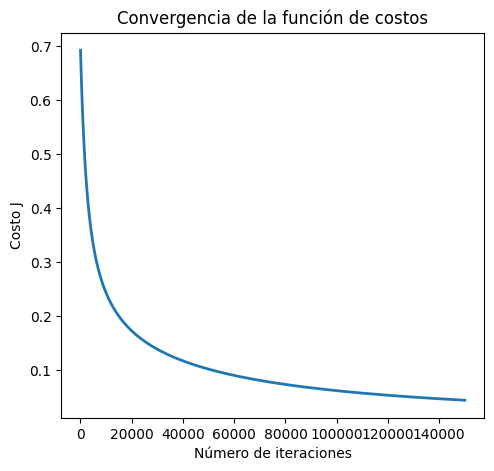

In [176]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Seleccionar las columnas relevantes (por ejemplo, 'winner.crowns' y 'loser.crowns' como características)
X_train = train_data[['winner.crowns', 'loser.crowns']].values
y_train = (train_data['winner.crowns'] > train_data['loser.crowns']).astype(int).values  # Etiqueta binaria (1 si el ganador tiene más coronas)

X_test = test_data[['winner.crowns', 'loser.crowns']].values
y_test = (test_data['winner.crowns'] > test_data['loser.crowns']).astype(int).values

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar las características
X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma

# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    accuracy_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
        
        # Calcular precisión
        predictions = h >= 0.5
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

    return theta, J_history, accuracy_history

# Elegir un valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 150000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history, accuracy_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Graficar la convergencia del costo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia de la función de costos')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Evaluar el modelo en el conjunto de prueba
def evaluarModelo(theta, X, y):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

accuracy_test = evaluarModelo(theta, X_test, y_test)
print('Precisión en el conjunto de prueba: {:.2f}%'.format(accuracy_test * 100))


In [164]:
print(X_test)
print(theta)

[[1. 0.]
 [2. 1.]
 [3. 2.]
 ...
 [3. 1.]
 [1. 1.]
 [2. 0.]]
[-0.62396705  0.08563921  0.29872125]


In [165]:
X_test, y_test = data['winner.crowns'], data['loser.crowns']
print(X_test)

0         2.0
1         1.0
2         2.0
3         2.0
4         3.0
         ... 
159995    3.0
159996    2.0
159997    2.0
159998    3.0
159999    2.0
Name: winner.crowns, Length: 160000, dtype: float64


Segunda clase "Ganador con 2 coronas"

theta calculado por el descenso por el gradiente: [-0.91440461  0.10029958  0.4472856 ]
Precisión en el conjunto de prueba: 65.01%


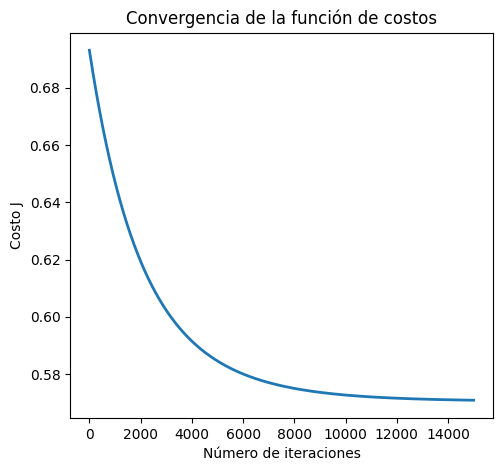

In [178]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Seleccionar las columnas relevantes (por ejemplo, 'winner.crowns' y 'loser.crowns' como características)
X_train = train_data[['winner.crowns', 'loser.crowns']].values
# Etiqueta binaria: 1 si el ganador tiene exactamente 2 coronas, 0 en caso contrario
y_train = (train_data['winner.crowns'] == 2).astype(int).values  

X_test = test_data[['winner.crowns', 'loser.crowns']].values
y_test = (test_data['winner.crowns'] == 2).astype(int).values

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar las características
X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma

# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    accuracy_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
        
        # Calcular precisión
        predictions = h >= 0.5
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

    return theta, J_history, accuracy_history

# Elegir un valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 15000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history, accuracy_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Graficar la convergencia del costo y la precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia de la función de costos')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Evaluar el modelo en el conjunto de prueba
def evaluarModelo(theta, X, y):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

accuracy_test = evaluarModelo(theta, X_test, y_test)
print('Precisión en el conjunto de prueba: {:.2f}%'.format(accuracy_test * 100))


Tercera clase "ganador con 3 coronas"

theta calculado por el descenso por el gradiente: [-0.91440461  0.10029958  0.4472856 ]
Precisión en el conjunto de prueba: 65.01%


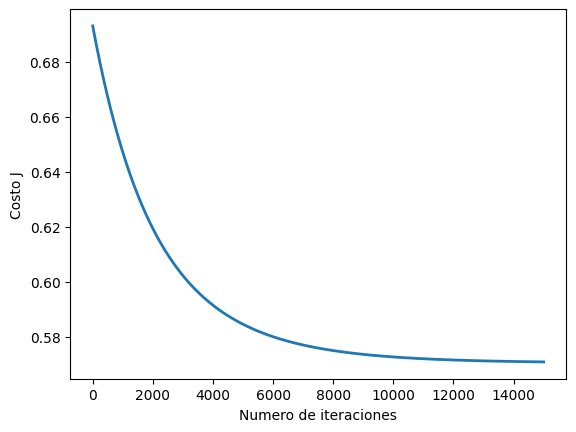

In [181]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Seleccionar las columnas relevantes (por ejemplo, 'winner.crowns' y 'loser.crowns' como características)
X_train = train_data[['winner.crowns', 'loser.crowns']].values
# Etiqueta binaria: 1 si el ganador tiene exactamente 2 coronas, 0 en caso contrario
y_train = (train_data['winner.crowns'] == 2).astype(int).values  

X_test = test_data[['winner.crowns', 'loser.crowns']].values
y_test = (test_data['winner.crowns'] == 2).astype(int).values

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar las características
X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma

# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    accuracy_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
        
        # Calcular precisión
        predictions = h >= 0.5
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

    return theta, J_history, accuracy_history

# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 15000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history, accuracy_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Evaluar el modelo en el conjunto de prueba
def evaluarModelo(theta, X, y):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

accuracy_test = evaluarModelo(theta, X_test, y_test)
print('Precisión en el conjunto de prueba: {:.2f}%'.format(accuracy_test * 100))

# 6.- Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.,      
# 7.- Se debe visualizar de manera obligatorio graficas que muestren el costo y la precisión en relación a los epochs de entrenamiento. 
# 8.- Se debe utilizar el dataset de entrenamiento para entrenar los pesos de los modelos desarrollados. 
# 9.- Se debe utilizar el dataset de prueba para determinar la efectividad de los modelos desarrollados.

Precisión en conjunto de entrenamiento: 41.57%
Precisión en conjunto de prueba: 41.43%


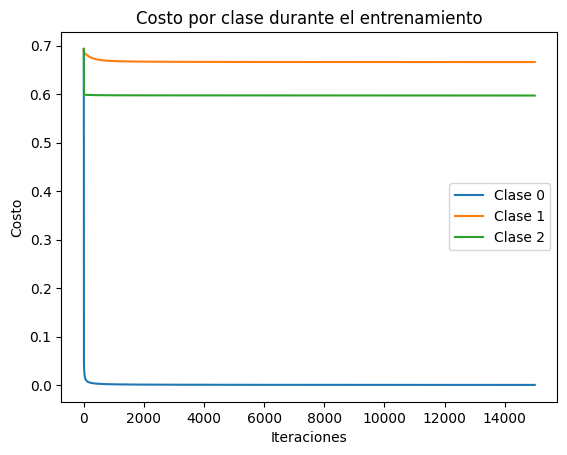

In [197]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo para la regresión logística con regularización
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    # Regularización (sin incluir el primer término)
    reg = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    # Costo
    J = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + reg
    
    # Gradiente
    grad = (1 / m) * X.T.dot(h - y)
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]
    
    return J, grad

# Descenso por gradiente
def gradientDescent(X, y, theta, alpha, num_iters, lambda_):
    J_history = []

    for i in range(num_iters):
        J, grad = lrCostFunction(theta, X, y, lambda_)
        theta = theta - alpha * grad
        J_history.append(J)
    
    return theta, J_history

# Entrenamiento One-vs-All
def oneVsAll(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    
    # Agregar columna de unos a X (intercepto)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        y_c = np.where(y == c, 1, 0)  # Etiqueta binaria para la clase c
        theta, _ = gradientDescent(X, y_c, initial_theta, alpha, num_iters, lambda_)
        all_theta[c] = theta
    
    return all_theta

# Predicción One-vs-All
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

# Cargar datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Seleccionar características y etiquetas del conjunto de entrenamiento
X_train = train_data[['winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.elixir.average']].values
y_train = train_data['winner.crowns'].values

# Seleccionar características y etiquetas del conjunto de prueba
X_test = test_data[['winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.elixir.average']].values
y_test = test_data['winner.crowns'].values

# Parámetros
lambda_ = 0.1  # Regularización
alpha = 0.001
num_iters = 15000
num_labels = len(np.unique(y_train))  # Número de clases

# Entrenar el modelo One-vs-All
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_, alpha, num_iters)

# Predicciones en el conjunto de prueba
pred_train = predictOneVsAll(all_theta, X_train)
pred_test = predictOneVsAll(all_theta, X_test)

# Calcular precisión
train_accuracy = np.mean(pred_train == y_train) * 100
test_accuracy = np.mean(pred_test == y_test) * 100

print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')

# Graficar el costo durante el entrenamiento
def plotCost(J_history):
    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.title('Costo durante el entrenamiento')
    plt.show()

# Entrenamiento con registro del costo
def oneVsAllWithCost(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    all_J_history = []
    
    # Agregar columna de unos a X (intercepto)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        y_c = np.where(y == c, 1, 0)  # Etiqueta binaria para la clase c
        theta, J_history = gradientDescent(X, y_c, initial_theta, alpha, num_iters, lambda_)
        all_theta[c] = theta
        all_J_history.append(J_history)
    
    return all_theta, all_J_history

# Entrenar y capturar el costo durante el entrenamiento
all_theta, all_J_history = oneVsAllWithCost(X_train, y_train, num_labels, lambda_, alpha, num_iters)

# Graficar los costos para todas las clases
for i, J_history in enumerate(all_J_history):
    plt.plot(np.arange(len(J_history)), J_history, label=f'Clase {i}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo por clase durante el entrenamiento')
plt.legend()
plt.show()